In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [35]:
file_path = "matchups_combined.csv"

In [36]:
matchups = pd.read_csv(file_path)

In [37]:
X = matchups.drop(columns=['OUTCOME', "TEAM", "ROUND", "BY YEAR NO", "BY ROUND NO", "SCORE", "UPSET"])
y = matchups['UPSET']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [42]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 200],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [43]:
svm = SVC()

In [44]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 200],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [46]:
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [48]:
best_model = grid_search.best_estimator_

In [49]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.725609756097561
F1 Score: 0.3283582089552239
Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.80      0.83       135
           1       0.29      0.38      0.33        29

    accuracy                           0.73       164
   macro avg       0.57      0.59      0.58       164
weighted avg       0.76      0.73      0.74       164

Confusion Matrix:
[[108  27]
 [ 18  11]]


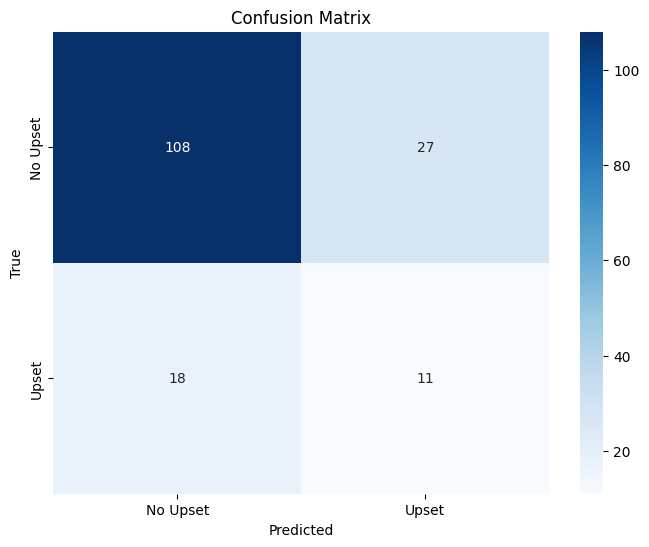

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)

classes = ['No Upset', 'Upset']  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()